In [1]:
pip install keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv("C:/Users/nikhi/Downloads/MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [5]:
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9083 entries, 1986-03-13 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9083 non-null   float64
 1   High       9083 non-null   float64
 2   Low        9083 non-null   float64
 3   Close      9083 non-null   float64
 4   Adj Close  9083 non-null   float64
 5   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 496.7 KB


In [6]:
df.shape

(9083, 6)

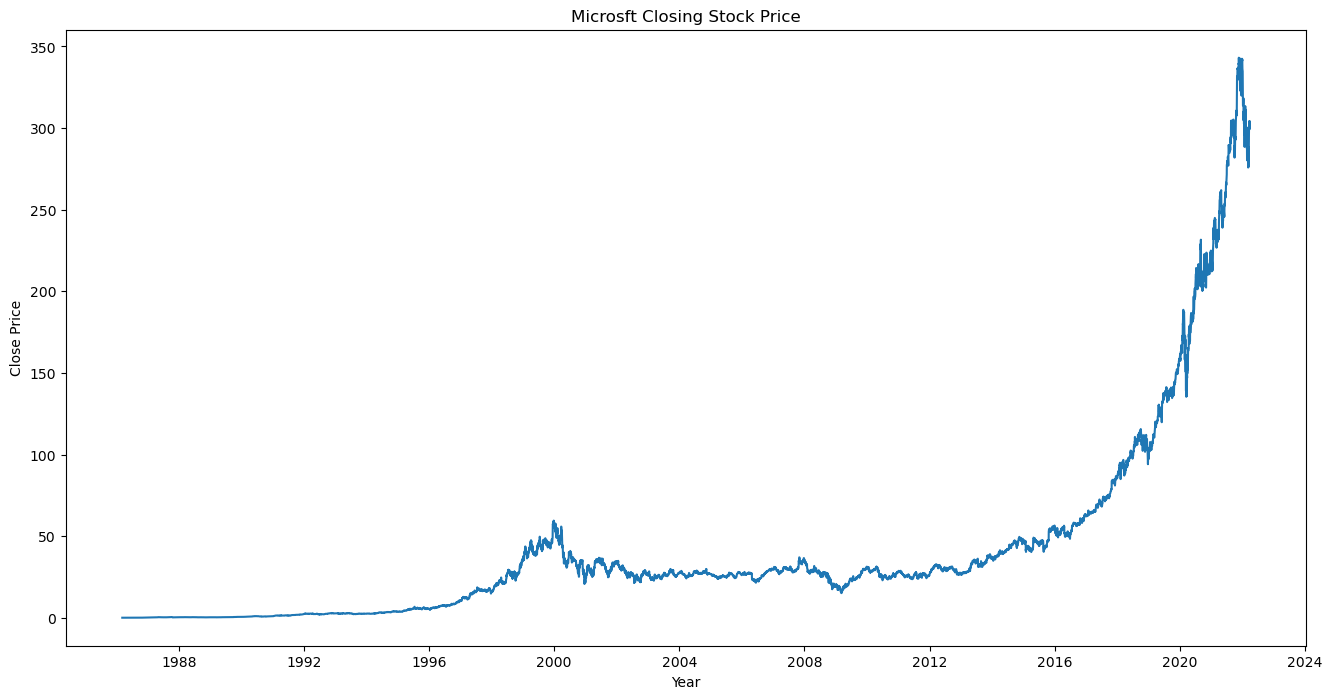

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Microsft Closing Stock Price')
plt.show()

In [8]:
data1=df['Close']

In [10]:
import math
Data=df.filter(['Close'])
dataset=Data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

7267

In [11]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.0013153162753806e-16
Standard deviation of processed data:  1.0


In [12]:
train_data = scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [13]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60, 1)

In [14]:

print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


In [15]:
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507601 (1.94 MB)
Trainable params: 507601 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
226/226 [==============================] - 34s 139ms/step - loss: 0.0024
Epoch 2/20
226/226 [==============================] - 33s 146ms/step - loss: 2.3320e-04
Epoch 3/20
226/226 [==============================] - 33s 144ms/step - loss: 1.9798e-04
Epoch 4/20
226/226 [==============================] - 34s 151ms/step - loss: 1.9355e-04
Epoch 5/20
226/226 [==============================] - 33s 148ms/step - loss: 1.7107e-04
Epoch 6/20
226/226 [==============================] - 33s 146ms/step - loss: 1.6512e-04
Epoch 7/20
226/226 [==============================] - 33s 148ms/step - loss: 1.5625e-04
Epoch 8/20
226/226 [==============================] - 33s 146ms/step - loss: 1.4367e-04
Epoch 9/20
226/226 [==============================] - 33s 146ms/step - loss: 1.2361e-04
Epoch 10/20
226/226 [==============================] - 33s 144ms/step - loss: 1.2707e-04
Epoch 11/20
226/226 [==============================] - 35s 154ms/step - loss: 1.0721e-04
Epoch 12/20
226/226 [=============

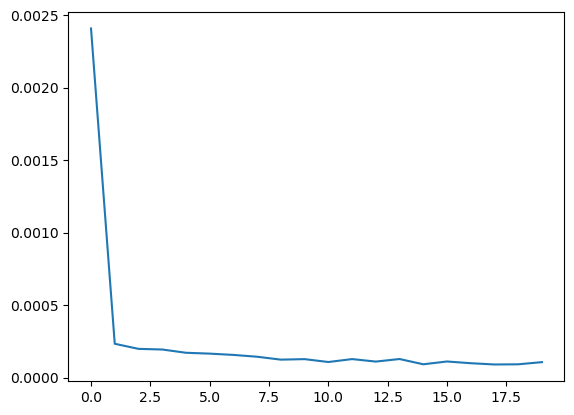

In [19]:
plt.plot(history.history['loss'])

In [20]:
test_data=scaled_data[training_data_len-60:, :]
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [21]:
x_test=np.array(x_test)

In [22]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 3s 37ms/step
[[ 46.683857]
 [ 47.997765]
 [ 47.70217 ]
 ...
 [258.93796 ]
 [261.16675 ]
 [260.5036  ]]


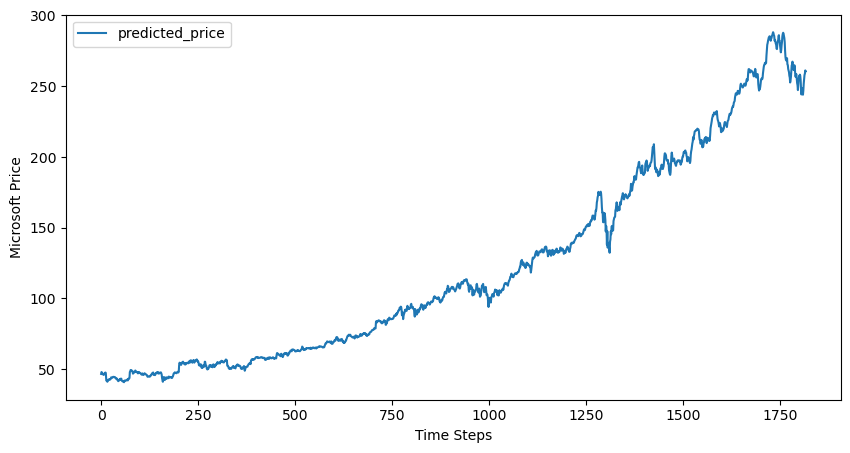

In [24]:
predicted_price = pd.DataFrame(predictions, columns = ['price'] )
predicted_price.head()
predicted_price.plot(figsize=(10,5))
plt.legend(['predicted_price'])
plt.ylabel("Microsoft Price")
plt.xlabel("Time Steps")
plt.show()